# Handle with Missing data on Time Series

The purpose of the kernel is that demonstrates ways of handling with missing data on time series dataset and creating starting point to prepare the ground to develop intellectuality and techniques about dealing with missing data.

1.  Loading Data
2.  Exploratory Analysis of Data ( EDA )
3.  Analysis of Missing Data by Visualisation
4.  Impututation Methods
5.  Comparision of Results



# Loading Dataset

In [18]:
import numpy as np
import pandas as pd 

import matplotlib as plt
%matplotlib inline

In [19]:
#import dataset 

df=pd.read_csv('Air_Quality.csv',parse_dates=['Date'],index_col='Date')
df.head()

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,NaN,NaN,14.3,56


# Exploratory Analysis

There are many ways and libraries to elucidate features of data. The pandas-profiling report is be used in this analysis, because of both comprehensive result and given short path-code by profiling report.

In [20]:
# EDA : describe data quickly by pandas-profiling

from pandas_profiling import ProfileReport
profile=ProfileReport(df, title='EDA of Air-Quality',html={'style':{'full_width':True}})

In [21]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# Pandas-Profiling -- Detect Missing Values

You can pass over from one widget to another one to see description of dataset.In this kernel, we will focus on missing variable. You can see them on Overview part throughout both being sum and percantange. Also, you can seperately investifate all variables' descriptions on variable part. In missing widget, you can study missing variable by different ways, including dendrogram,heatmap,matrix and count calculations. Futhermore, if you look at warning part you can see which variables have missing value and their proportion.

Beyond above, in the interaction widget, you can see how variables correlated with each other and not by scatter plot. Also, you can look at correlation sheet for heatmap and observe correlation by different calculation methodologies.


In our small dataset, variable of 'Ozone' and 'Solar' have missing values. As you know, handling with missing value is important part of preprocessing data because to find tidy and clear data is so hard. There are two options to deal with missing values; removing or imputing. Also we can create dummy variables and bining missing values into one group, but in this dataset we have not categorical variables.

# How do we decide what to do with null value

First of all, we should check importance of missing values. This means how variables which have missing values affect the dataset. Whether it is ignorable or not.İf it is ignorable, we can remove them by using pairwise method or listwise method. However, if it is not ignorable we implement different imputation methodologies.

****The Types of Missingness

1. MCAR ( Missing completely at Random)
2. MAR  (Missing at Random)
3. MNAR (Missing not at Random)

MCAR means that "Missingness has no relationship between any values, observed or missing". Therefore, in this situation you can remove missing values. For that, you can use pairwise method (delete column missing value; minimize lost data) or listwise method (delete row missing value). MAR means that "There is a systematic relationship between missingness and other observed data, but not the missing data". Final, MNAR means that "There is a relationship between missingness and its values, missing or non-missing".

**** How determine which kind of Missingness

There are a lot of ways for that. I prefer basic visualization to determine type of missingness. The package of 'missingno' provides us with some brilliant demonstration to guide for our decision. Actually, the pandas-profiling shows us which variable have what kind of missingness type. You can compare similarity of outputs.

# Analysis of Missing Data by Visualisation

<AxesSubplot:>

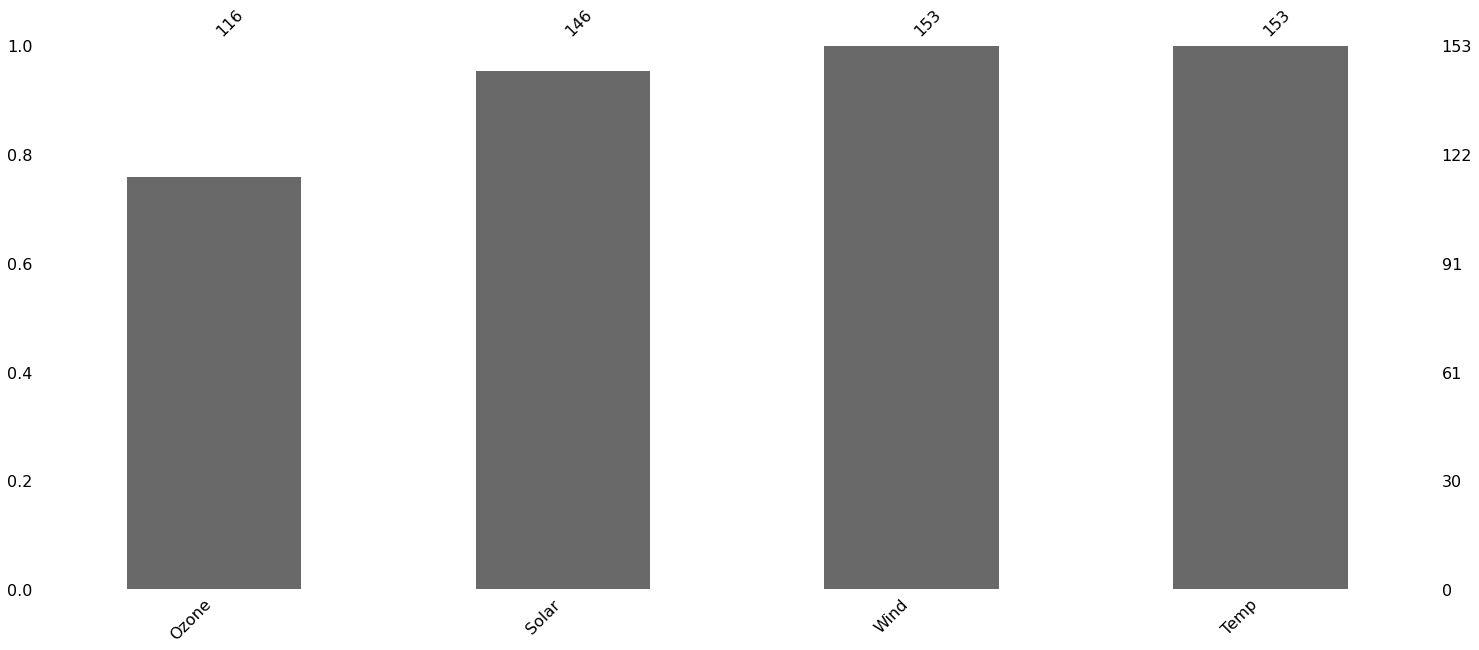

In [22]:
#visualize data 

# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt

# Plot amount of missingness
msno.bar(df) # you can see pandas-profilin count part

<AxesSubplot:>

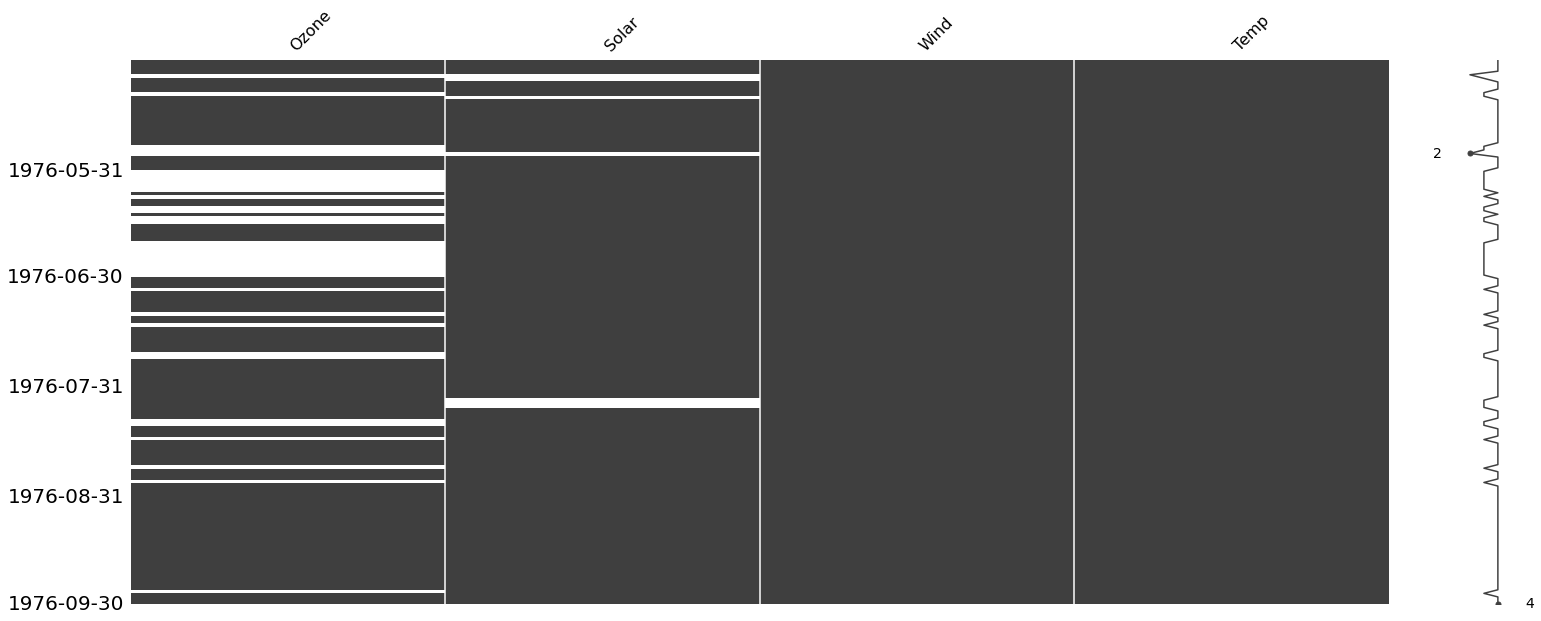

In [23]:
# Plot nullity matrix of airquality with frequency 'M'
msno.matrix(df, freq='M') # this part actually displays the missingness types, also more visible version of pandas-profiling matrix.

When we look at 'Ozone' variable, we can see missingness frequency. It is absolutely MNAR type. Therefore, we will select imputation technique rather than removing Also, we may say abouy 'Solar' variable as being MAR type. So, we will impute them also.

# Time Series Imputation Techniques

**** The Fillna() Method

The method fills missing values according to sequency condition. It means that the method replaces 'nan's value with last observed non-nan value or next observed non-nan value.

1. backfill - bfill    : according to last observed value
2. forwardfill - ffill : according to next observed value

**** Interpolate() Method

The method is more complex than above fillna() method. It consists of different methodologies, including 'linear','quadratic','nearest'.

1. Linear    : Impute linearly or with equidistant values, draw linearity between 2 non missing value to fill gap.
2. Quadratic : Impute parabolic trajectory in negative direction to positive, it has large bias in some condition.
3. Nearest   : Impute with the nearest observable value, it consists of both bfill and ffill method actually.



Below, visualization consists of 'Ozone' variable only, because clearly demonstrate effects of different kind of techniques.

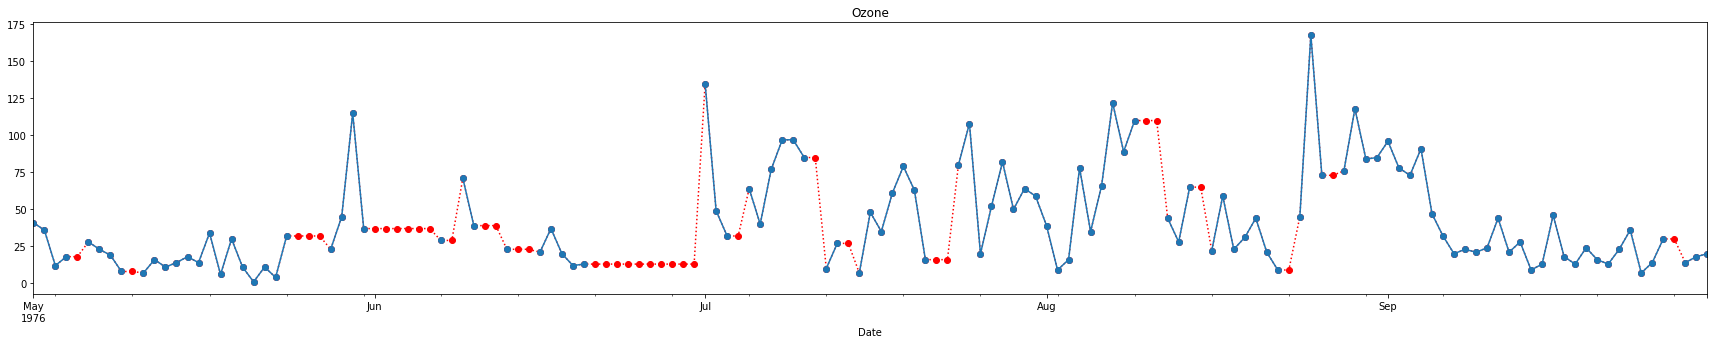

In [27]:
### Forward Fill
# Impute airquality DataFrame with ffill method
ffill_imputed = df.copy(deep=True)

ffill_imputed.fillna(method='ffill',inplace=True)

# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
df['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

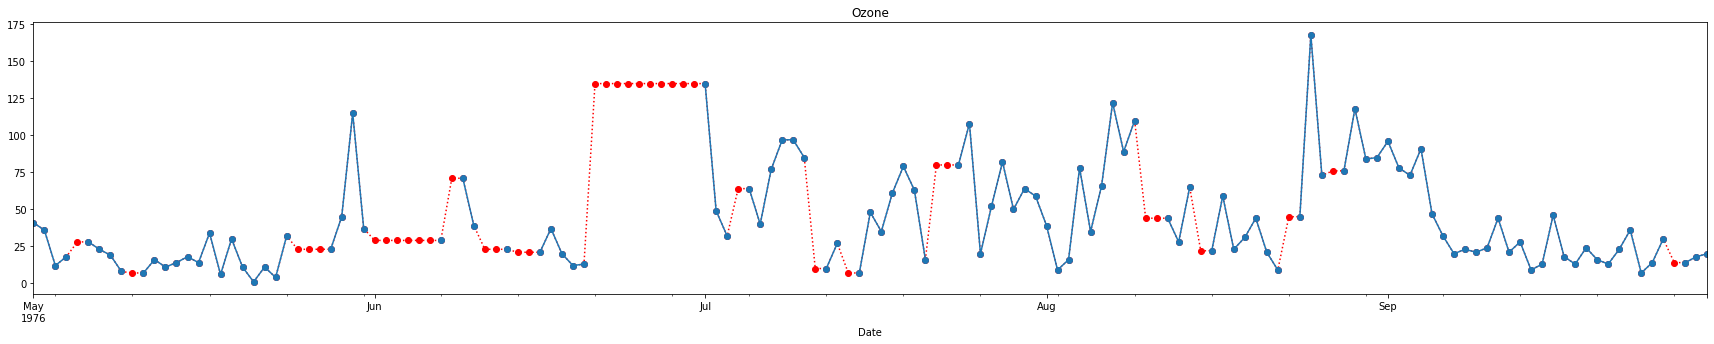

In [28]:
### Back Fill Fill
# Impute airquality DataFrame with bfill method
bfill_imputed = df.copy(deep=True)

bfill_imputed.fillna(method='bfill',inplace=True)

# Plot the imputed DataFrame bfill_imp in red dotted style 
bfill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
df['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

<AxesSubplot:title={'center':'Ozone'}, xlabel='Date'>

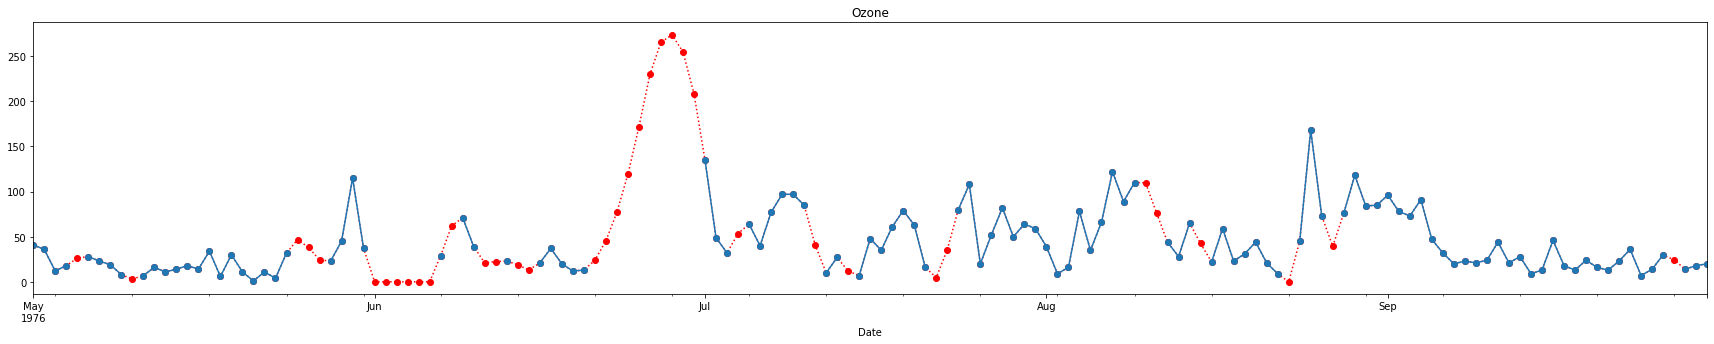

In [29]:
# Interpolate the NaNs quadratically

quadratic_imput=df.copy(deep=True)

quadratic_imput.interpolate(method='quadratic', inplace=True)

quadratic_imput['Ozone'].clip(lower=0).plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

df['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))


<AxesSubplot:title={'center':'Ozone'}, xlabel='Date'>

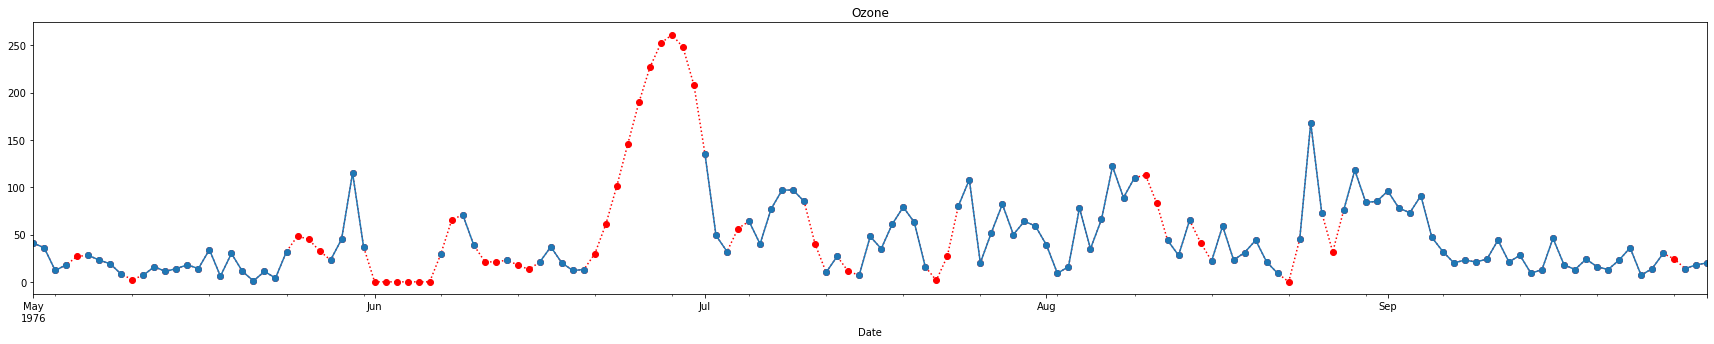

In [30]:
# Interpolate the NaNs by nearest method

cubicspline_imput=df.copy(deep=True)

cubicspline_imput.interpolate(method='cubicspline', inplace=True)

cubicspline_imput['Ozone'].clip(lower=0).plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

df['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

<AxesSubplot:title={'center':'Ozone'}, xlabel='Date'>

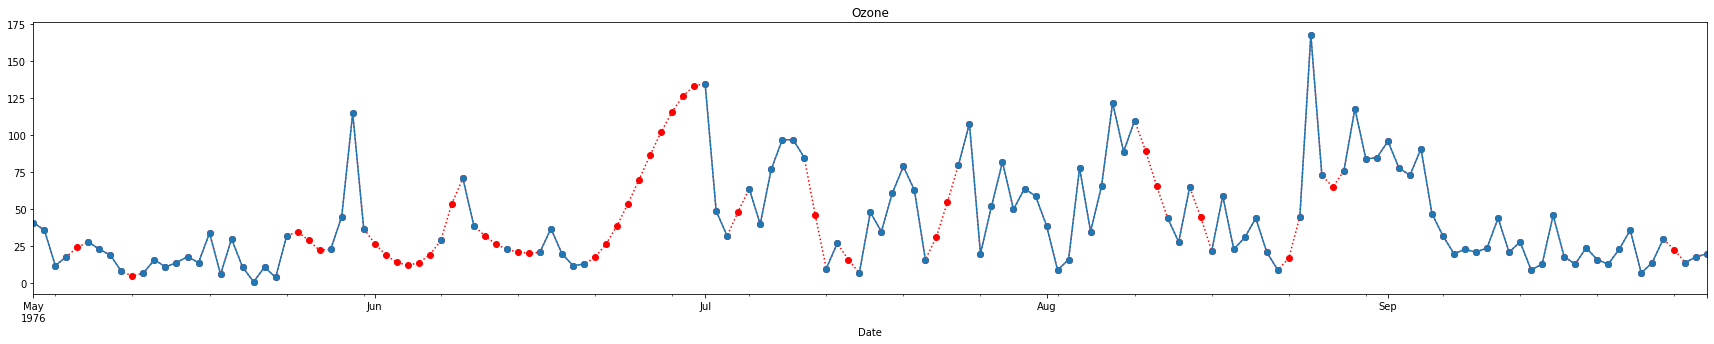

In [31]:
# Interpolate the NaNs by nearest method

akima_imput=df.copy(deep=True)

akima_imput.interpolate(method='akima', inplace=True)

akima_imput['Ozone'].clip(lower=0).plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

df['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

<AxesSubplot:title={'center':'Ozone'}, xlabel='Date'>

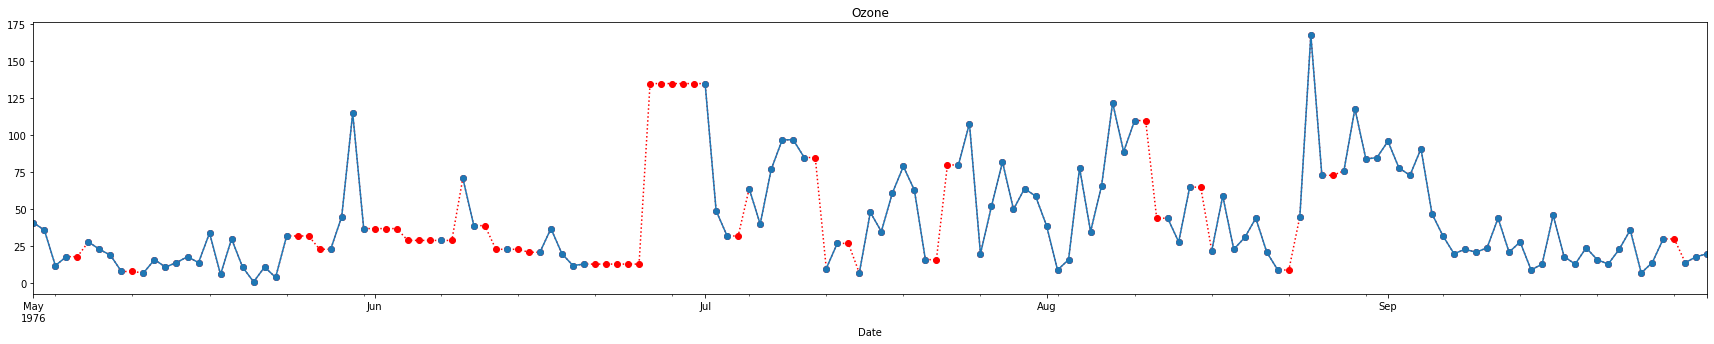

In [32]:
# Interpolate the NaNs by linear method

nearest_imput=df.copy(deep=True)

nearest_imput.interpolate(method='nearest', inplace=True)

nearest_imput['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

df['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

<AxesSubplot:title={'center':'Ozone'}, xlabel='Date'>

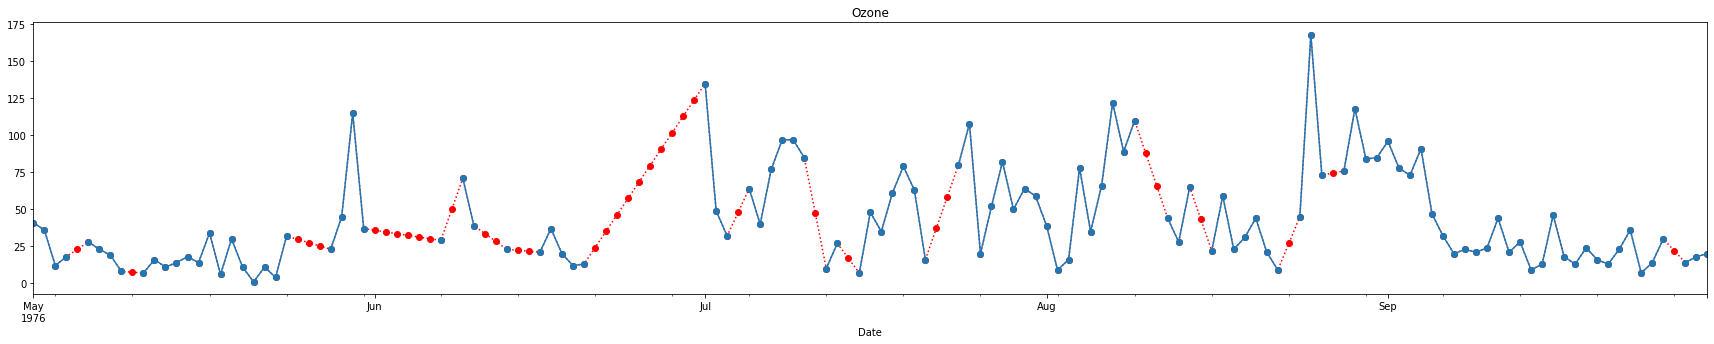

In [33]:
# Interpolate the NaNs by linear method

linear_imput=df.copy(deep=True)

linear_imput.interpolate(method='linear', inplace=True)

linear_imput['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

df['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

# Comparision of Results

In [60]:
interpolations.keys()

dict_keys(['Airquality', 'Back-fill', 'Forward-fill', 'Linear Interpolation', 'Nearest Interpolation', 'Quadratic Interpolation', 'Cubicspline Interpolation', 'Akima Interpolation'])

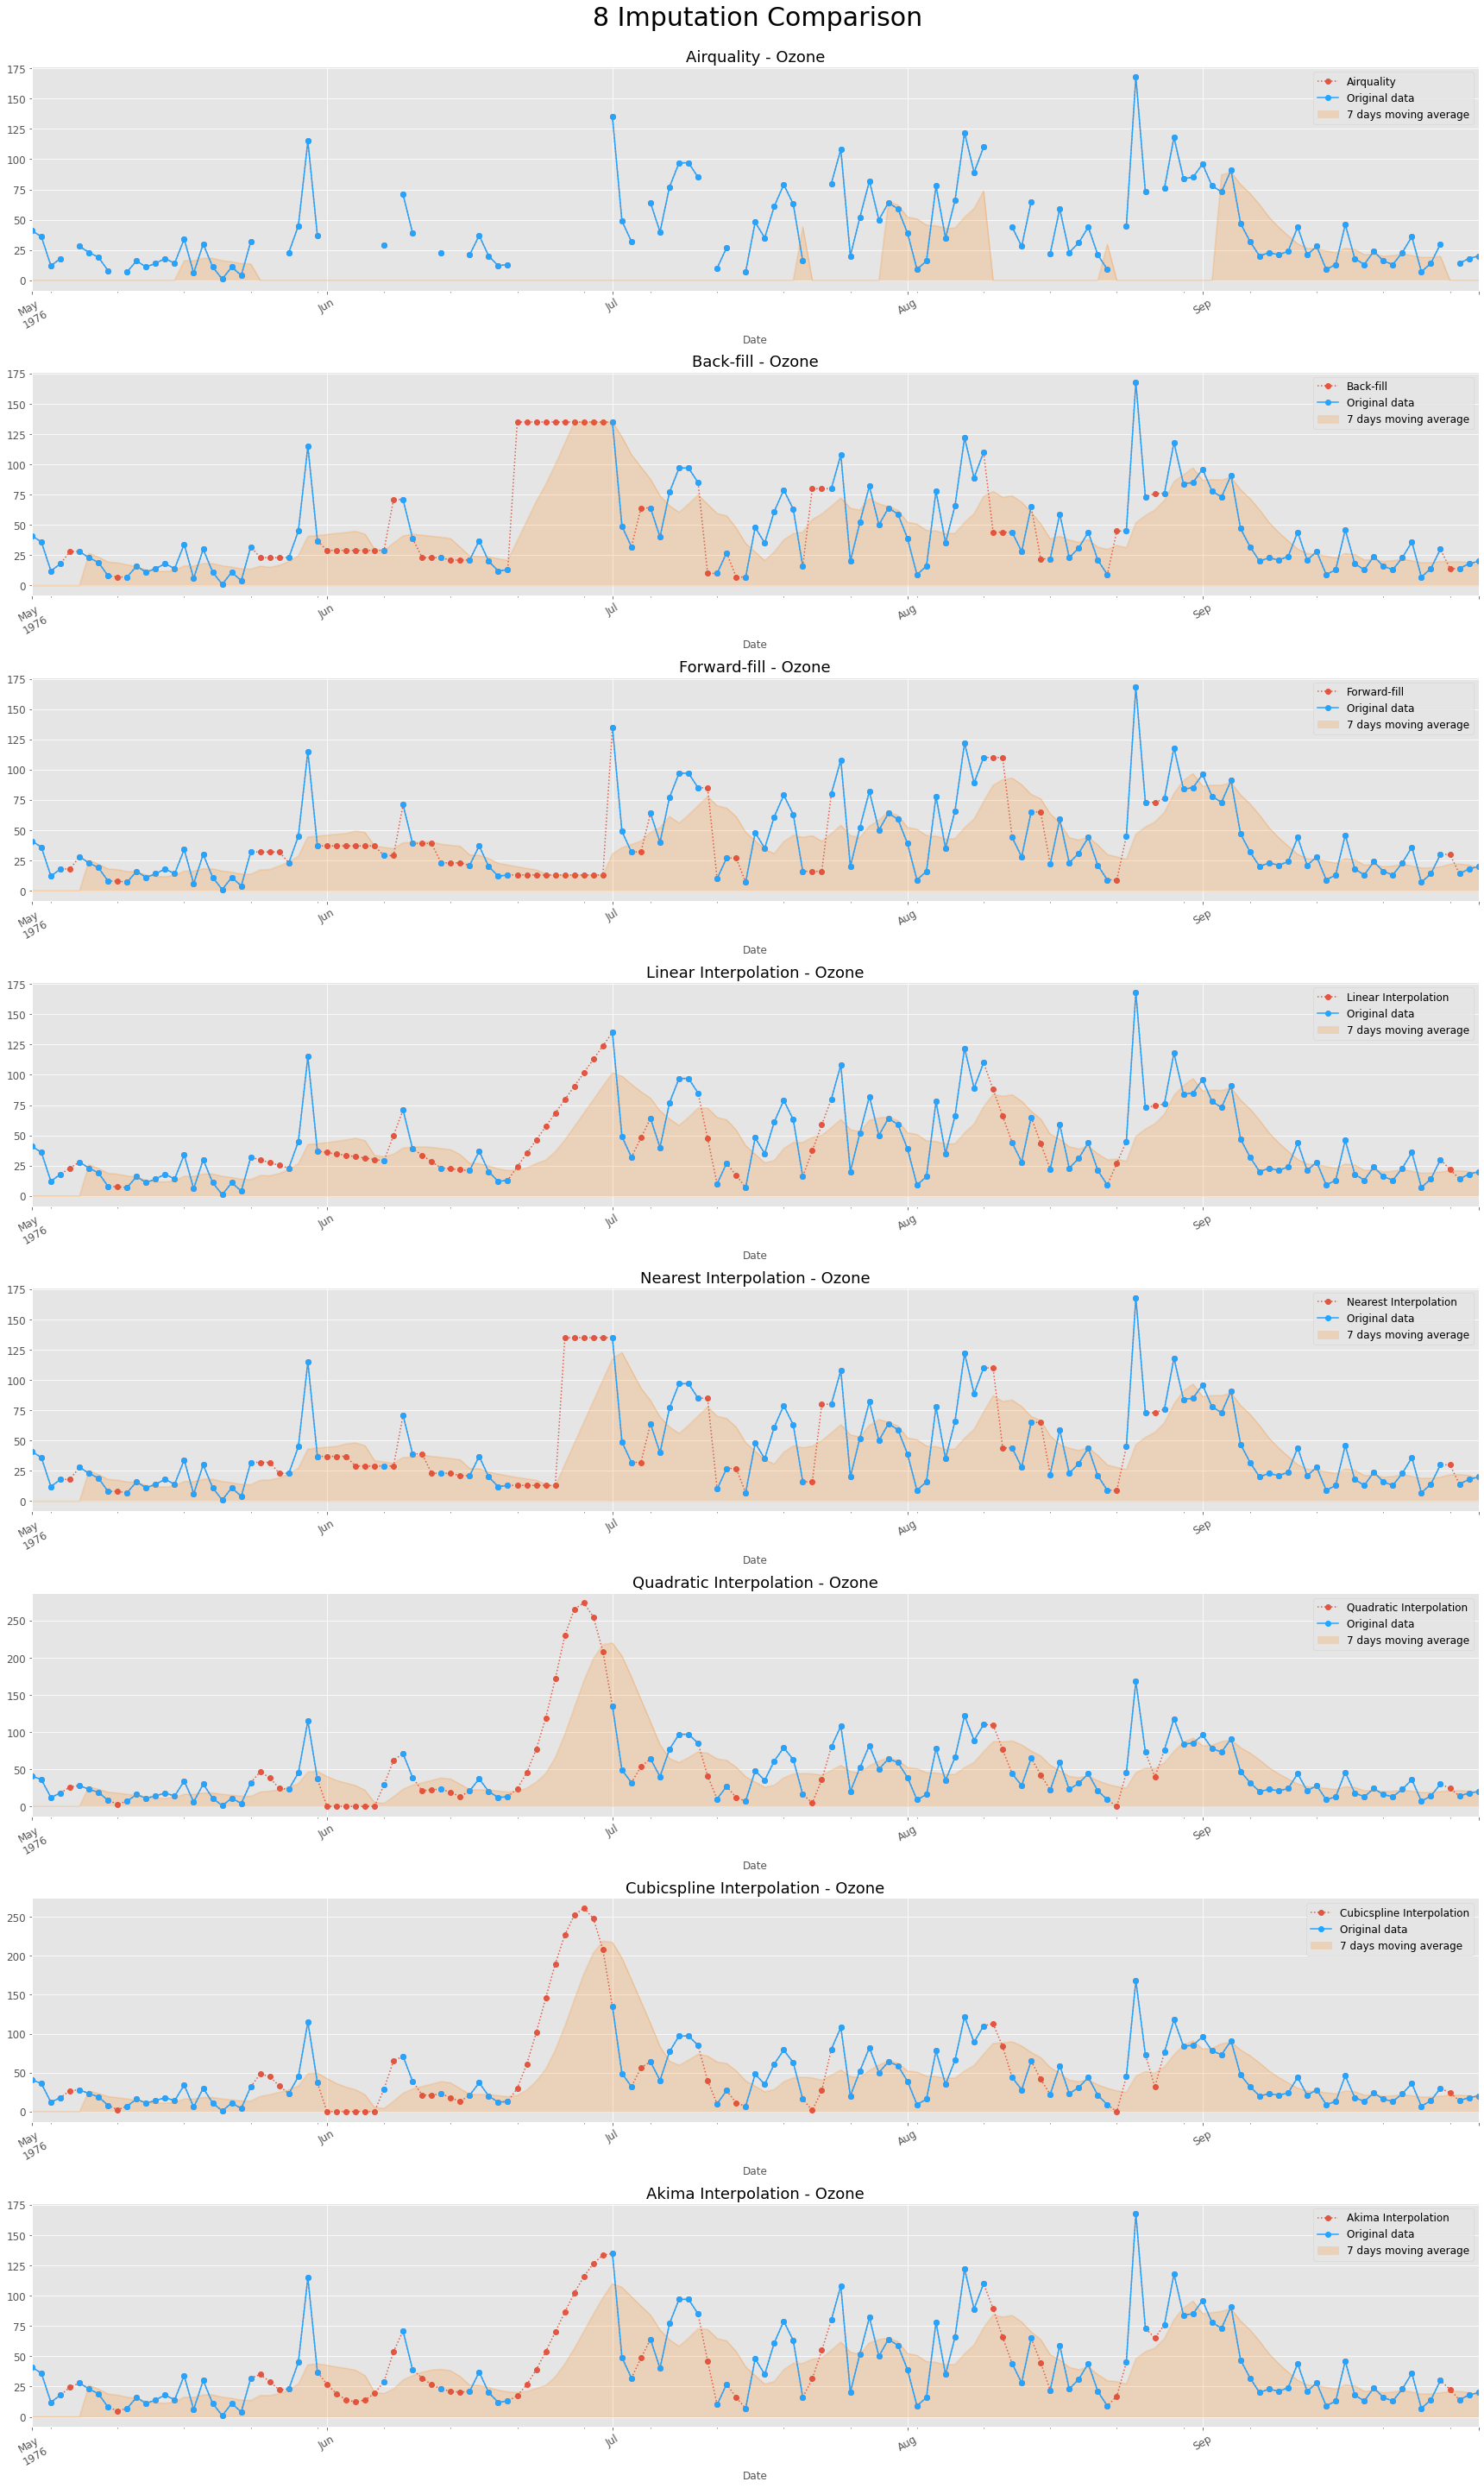

In [101]:
plt.style.use('ggplot')
fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(24, 5*8))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("8 Imputation Comparison", fontsize=30, x = .51,y=1)

interpolations = {'Airquality': df, 
                  'Back-fill': bfill_imputed, 
                  'Forward-fill':ffill_imputed,
                  'Linear Interpolation': linear_imput, 
                  'Nearest Interpolation': nearest_imput,
                  'Quadratic Interpolation': quadratic_imput, 
                  'Cubicspline Interpolation': cubicspline_imput,
                  'Akima Interpolation': akima_imput}

for df_key,ax in zip(interpolations, axs.ravel()):
    
    interpolations[df_key].clip(lower=0).Ozone.plot(marker='o',linestyle='dotted',ax=ax, label = df_key, alpha = .9)
    df.Ozone.plot(title=df_key + ' - Ozone',marker='o',ax=ax,color = '#22a4ff', label = 'Original data')

    interpolations[df_key].clip(lower=0).Ozone.rolling(7).mean().plot.area(ax=ax,rot = 30, fontsize = 12,label = f'7 days moving average',color = '#fd830e',alpha=.2)
    ax.set_title(f"{df_key} - Ozone",fontsize = 18)
    ax.legend(fontsize = 12)
plt.tight_layout()